# Assignment8

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [122]:
df = pd.read_csv("car_data.csv")

In [123]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [124]:
df.shape

(804, 12)

In [125]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

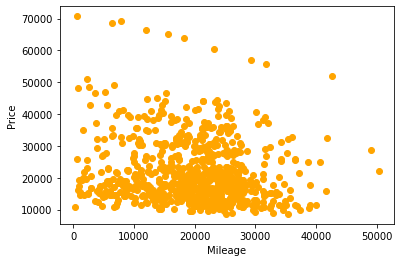

In [126]:
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.scatter(df['Mileage'],df['Price'],color='orange')

In [127]:
x=df[['Mileage']]
y=df[["Price"]]


Find the linear regression equation for mileage vs price.


In [128]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [129]:
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: [24764.55900606]
coefficients: [[-0.1725205]]


Find the equation's  R2  score

In [130]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.02046344732348926


In [144]:
y_pred=linreg.predict(x)


Chart the original data and the equation on the chart.

Text(0.5, 1.0, 'Mileage vs Price')

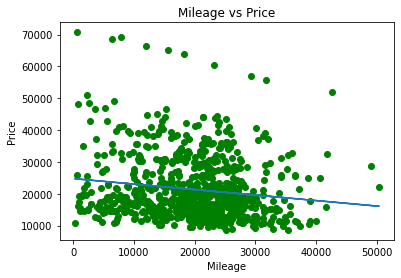

In [132]:
plt.scatter(x, y, color='g')
plt.plot(x, linreg.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.


In [133]:
#mileage, cylinders, liters, doors, cruise, sound, and leather
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [134]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
Y = df[['Price']]

In [135]:
linre=LinearRegression()
linre.fit(X,Y)

LinearRegression()

In [136]:
print('intercept:', linre.intercept_)
print('coefficients:', linre.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


Find the equation's  R2  score

In [137]:
print('r-squared: ', linre.score(X, Y))

r-squared:  0.4462643536728379


In [ ]:
y_pred=linre.predict(X)


Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [70]:
d = df[["Price",'Make','Model','Type']]

In [72]:
d=pd.get_dummies(d,columns=['Make','Model',"Type"])

In [73]:
d

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
x=d.iloc[:,1:]
y=d.iloc[:,0]
x

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [77]:
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: 3.736713073551753e+16
coefficients: [ 3.54621674e+16 -8.01254163e+16 -6.81633473e+16 -2.55767775e+16
 -3.14077518e+16 -9.14294606e+15 -1.01060773e+16 -1.01060773e+16
 -1.01060773e+16 -1.01060773e+16 -1.01060773e+16  2.66495182e+16
 -1.59370516e+16  3.86115871e+16  3.86115871e+16  2.66495182e+16
 -7.69759965e+16  2.66495182e+16  2.66495182e+16  2.66495182e+16
  3.86115871e+16 -1.59370516e+16 -1.59370516e+16 -1.59370516e+16
 -1.59370516e+16  2.66495182e+16 -3.23708831e+16 -3.23708831e+16
 -7.69759965e+16 -7.69759965e+16  2.66495182e+16  2.66495182e+16
 -7.69759965e+16  3.86115871e+16  3.86115871e+16 -1.59370516e+16
 -1.59370516e+16  3.86115871e+16  4.14669838e+15  4.14669838e+15
  4.14669838e+15  4.14669838e+15  4.14669838e+15]


In [78]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.9584529353845586
